# **Функции активации**

Определяют выходное значение нейрона в зависимости от результата взвешенной суммы входов и порогового значения.

Применяются к нейрону после того, просчитанному матричным умножением.  Определяет, передавать ли полученное значение следующему нейрону (активировать его) или нет, и модифицировать ли как-то полученное значение.

Рассмотрим подробнее такие функции активации, как:
- ступенчатая
- линейная (linear)
- сигмоидная (sigmoid)
- гиперболического тангенса (tahn)
- ReLU
- softmax

Рассмотрим нейрон, у которого взвешенная сумма равна z.

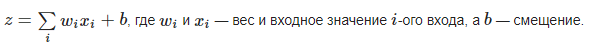

Полученный результат передается в функцию активации, которая решает рассматривать этот нейрон как активированный, или его можно игнорировать.

## **Ступенчатая**

Ступенчатая функция (англ. binary step function) является пороговой функцией активации. То есть если z больше или меньше некоторого значения, то нейрон становится активированным. Такая функция отлично работает для бинарной классификации. Но она не работает, когда для классификации требуется большее число нейронов и количество возможных классов больше двух.

![BinaryStepFunction[1].jpg](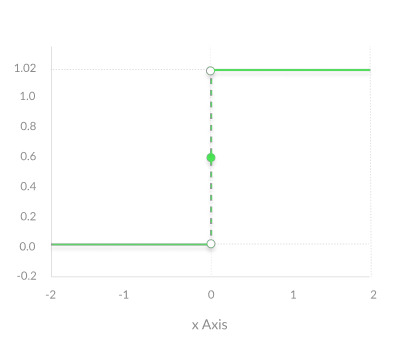)

## **Линейная (linear)**

Линейная функция (англ. linear function) представляет собой прямую линию, а это значит, что результат этой функции активации пропорционален переданному аргументу. В отличии от предыдущей функции, она позволяет получить диапазон значений на выходе, а не только бинарные 0 и 1, что решает проблему классификации с большим количеством классов.

У линейной функции есть две основных проблемы:

1. Невозможность использования метода обратного распространения ошибки. Так как в основе этого метода обучения лежит градиентный спуск, а для того чтобы его найти, нужно взять производную, которая для данной функции активации — константа и не зависит от входных значений. То есть при обновлении весов нельзя сказать улучшается ли эмпирический риск на текущем шаге или нет.

2. Так как для каждого слоя выходное значение линейно, то они образуют линейную комбинацию, результатом которой является линейная функция. То есть финальная функция активации на последнем слое зависит только от входных значений на первом слое. А это значит, что любое количество слоев может быть заменено всего одним слоем, и, следовательно, нет смысла создавать многослойную сеть.


**Главное отличие** линейной функции от остальных в том, что ее область определения не ограничена: (−∞;+∞). Следовательно, ее нужно использовать, когда выходное значение нейрона должно ∈R, а не ограниченному интервалу.

![LinearFunction[1].jpg](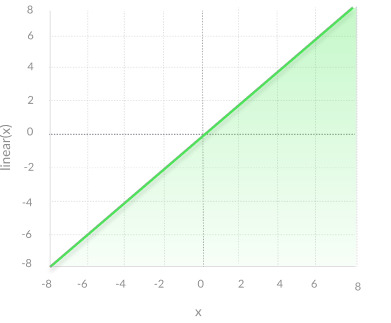)

## **Сигмоидная функция (sigmoid)**

Сигмоидная функция (англ. sigmoid function), которую также называет логистической (англ. logistic function), является гладкой монотонно возрастающей нелинейной функцией.
Преобразует выходное значение нейрона в значение из диапазона [0, +1], смещает среднее значение с 0 и используется в случаях, когда нужно получить что-то похожее на вероятность.

Хорошо себя показывает в LSTM-сетках, логистической регрессии.

![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/36f792c44c0a7069ad01386452569d6e34fe95d7) ![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/5/5b/Activation_logistic.svg/120px-Activation_logistic.svg.png)

И так как эта функция нелинейна, то ее можно использовать в нейронных сетях с множеством слоев, а также обучать эти сети методом обратного распространения ошибки.

- Сигмоида ограничена двумя горизонтальными асимптотами y=1 и y=0, что дает нормализацию выходного значения каждого нейрона.
- Кроме того, для сигмоидной функции характерен гладкий градиент, который предотвращает "прыжки" при подсчете выходного значения.
- Помимо всего этого, у этой функции есть еще одно преимущество, для значений x>2 и x<−2, y "прижимается" к одной из асимптот, что позволяет делать четкие предсказания классов.

Несмотря на множество сильных сторон сигмоидной функции, у нее есть значительный недостаток. Производная такой функции крайне мала во всех точках, кроме сравнительно небольшого промежутка - **проблема исчезающего градиента**. Это сильно усложняет процесс улучшения весов с помощью градиентного спуска. Более того, эта проблема усугубляется в случае, если модель содержит много слоев.

Что касается использования сигмоидной функции, то ее преимущество над другими — в нормализации выходного значения. Иногда, это бывает крайне необходимо. К примеру, когда итоговое значение слоя должно представлять вероятность случайной величины. Кроме того, эту функцию удобно применять при решении задачи классификации, благодаря свойству "прижимания" к асимптотам.


![SigmoidFunction[1].jpg](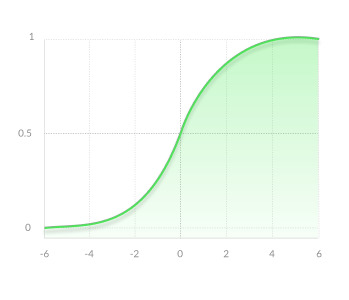)

## **Функция гиперболического тангенса (tahn)**

Функция гиперболического тангенса (англ. hyperbolic tangent). Преобразует выходное значение нейрона в значение из диапазона [-1, +1], не смещает среднее значение. Имеет вид:

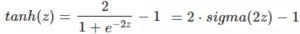

Эта функция является скорректированной сигмоидной функцей, то есть она сохраняет те же преимущества и недостатки, но уже для диапазона значений (−1;1).

- Обычно, tanh является предпочтительнее сигмоиды в случаях, когда нет необходимости в нормализации. Это происходит из-за того, что область определения данной функции активации центрирована относительно нуля, что снимает ограничение при подсчете градиента для перемещения в определенном направлении.

- Кроме того, производная гиперболического тангенса значительно выше вблизи нуля, давая большую амплитуду градиентному спуску, а следовательно и более быструю сходимость.

![TanhFunction[1].jpg](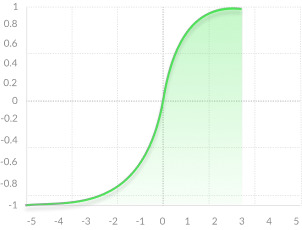)

## **Функция ReLU**

Функция ReLU (Rectified Linear Unit) — это наиболее часто используемая функция активации при глубоком обучении. Данная функция возвращает 0, если принимает отрицательный аргумент, в случае же положительного аргумента, функция возвращает само число. То есть она может быть записана как f(z)=max(0,z).



![alt text](https://wikimedia.org/api/rest_v1/media/math/render/svg/f4353f4e3e484130504049599d2e7b040793e1eb) ![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Activation_rectified_linear.svg/120px-Activation_rectified_linear.svg.png)

На первый взгляд может показаться, что она линейна и имеет те же проблемы что и линейная функция, но это не так и ее можно использовать в нейронных сетях с множеством слоев. Функция ReLU обладает несколькими преимущества перед сигмоидой и гиперболическим тангенсом:

- Очень быстро и просто считается производная. Для отрицательных значений — 0, для положительных — 1.
- Разреженность активации. В сетях с очень большим количеством нейронов использование сигмоидной функции или гиперболического тангенса в качестве активационный функции влечет активацию почти всех нейронов, что может сказаться на производительности обучения модели. Если же использовать ReLU, то количество включаемых нейронов станет меньше, в силу характеристик функции, и сама сеть станет легче.

У данной функции есть один недостаток, называющийся **проблемой умирающего ReLU**. Так как часть производной функции равна нулю, то и градиент для нее будет нулевым, а то это значит, что веса не будут изменяться во время спуска и нейронная сеть перестанет обучаться.

Функцию активации ReLU следует использовать, если нет особых требований для выходного значения нейрона, вроде неограниченной области определения. Но если после обучения модели результаты получились не оптимальные, то стоит перейти к другим функциям, которые могут дать лучший результат.

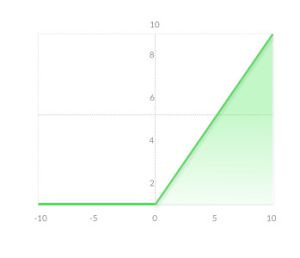

## **Функция Leaky ReLU**


Одной из проблем стандартного ReLU является затухающий, а именно нулевой, градиент при отрицательных значениях. При использовании обычного ReLU некоторые нейроны умирают, а отследить умирание нейронов не просто. Чтобы решить эту проблему иногда используется подход ReLU с «утечкой» (leak) — график функции активации на отрицательных значениях образует не горизонтальную прямую, а наклонную, с маленьким угловым коэффициентом (порядка 0,01).



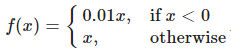

Такое небольшое отрицательное значение помогает добиться ненулевого градиента при отрицательных значениях. Однако, функция Leaky ReLU имеет некоторые недостатки:

- Сложнее считать производную, по сравнению со стандартным подходом (так как значения уже не равны нулю), что замедляет работу каждой эпохи.
- Угловой коэффициент прямой также является гиперпараметром, который надо настраивать.
- На практике, результат не всегда сильно улучшается относительно ReLU.

Стоит отметить, что помимо проблемы умирающих нейронов, у ReLU есть и другая — проблема затухающего градиента. При слишком большом количестве слоев градиент будет принимать очень маленькое значение, постепенно уменьшаясь до нуля. Из-за этого нейронная сеть работает нестабильно и неправильно. Leaky ReLU (LReLU) решает первую проблему, но в по-настоящему глубоких сетях проблема затухания градиента все еще встречается и при использовании этого подхода.

На практике LReLU используется не так часто. Требуется дополнительно настраивать гиперпараметр (уровень наклона при отрицательных значениях), что требует определенных усилий.

Еще одной проблемой является то, что результат LReLU не всегда лучше чем при использовании обычного ReLU, поэтому чаще всего такой подход используют как альтернатива. Довольно часто на практике используется PReLU (Parametric ReLU), который позволяет добиться более значительных улучшений по сравнению с ReLU и LReLU.

![LReLuFunction[1].jpg](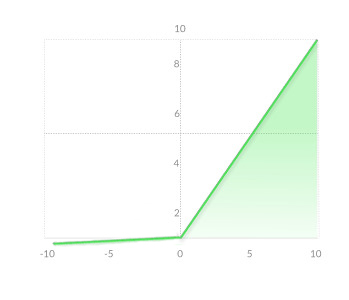)

## **Функция Softmax**

Softmax — это обобщение логистической функции (уравнение Ферхюльста) для многомерного случая.

Функция преобразует вектор x размерности K в вектор sigma той же размерности, где каждая координата sigma_i полученного вектора представлена вещественным числом в интервале [0,1] и сумма координат равна 1.

Координаты sigma_i вычисляются следующим образом:

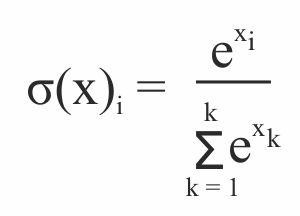

Функция Softmax применяется для задач классификации, когда количество возможных классов больше двух (для двух классов используется логистическая функция). Координаты sigma_i полученного вектора при этом трактуются как вероятности того, что объект принадлежит к классу i.

Давайте рассмотрим принцип работы функции `softmax` на простом примере. У нас есть входной вектор `inp` из 4 значений:   

In [ ]:
inp = [-4, 5, 2,-8]

Напишем функцию для расчета i-той координаты:

In [ ]:
import numpy as np
def soft(i, data):
    param1 = np.exp(data[i])        # Получение значения в числителе
    param2 = np.exp(data).sum()     # Получение значения в знаменателе
    return param1/param2

А теперь получим результат применения функции `softmax` к нашему набору:

In [ ]:
out1 = soft(0, inp)                 # Получение результата работы софтмакс-функции к первому элементу входных данных
out2 = soft(1, inp)                 # Получение результата работы софтмакс-функции ко второму элементу входных данных
out3 = soft(2, inp)                 # Получение результата работы софтмакс-функции к третьему элементу входных данных
out4 = soft(3, inp)                 # Получение результата работы софтмакс-функции к четвертому элементу входных данных
out = [out1, out2, out3, out4]      # Формирование результирующего вектора
print(out)

[0.00011754291529297411, 0.9524601077108533, 0.047420196500263315, 2.1528735904351842e-06]


Проверим полученный результат (сумма всех значений результирующего вектора должна равняться единице):

In [ ]:
sum(out)

1.0

# Немного дополнительной теории

Активационные функции являются неотъемлемым звеном в архитектуре нейронной сети.

Определение активационной функции:

Активационная функция - это универсальная математическая формула, согласно которой сумма произведений входных значений и весовых коэффициентов преобразуется в упорядоченные выходные значения в рамках одного слоя нейронной сети.

В библиотеке Keras имеется хороший выбор активационных функций, алгоритм которых написан заранее для удобства разработчиков.

В архитектуре сети различают входной, скрытые и выходной типы слоёв. Активационные функции применяются для каждого скрытого и выходного слоёв индивидуально - указываются как гиперпараметр:

`model.add(Dense(1, activation= "linear" ))`
Чтобы получить наилучшую точность модели сети разработчик должен уметь правильно подобрать функцию активации (она же - активационная функция) для конкретного слоя.

Так как про область применения функций активации уже было сказано , закрепим данный пункт - необходимо провести условное различие между функциями для скрытых слоёв и функцией выходного слоя.

Для скрытых слоёв наиболее часто используются следующие функции активации:

Sigmoid - преобразует малые значения (< - 5) в близкие к нулю, а большие значения ( > 5 ) в близкие к единице.

Вычисляется по программной формуле (Python): sigmoid(x) = 1 / (1 + exp(-x))

ReLU - возвращает входные значения без изменения, если знак значений положительный; отрицательные значения преобразует к нулю.

Вычисляется по программной формуле (Python): relu = max(x, 0)

Tahn - функция гиперболического тангенса; возвращает различные значения в диапазоне (- 1;1 ).

Вычисляется по программной формуле (Python): tanh(x) = sinh(x)/cosh(x) = ((exp(x) - exp(-x))/(exp(x) + exp(-x)))

Скрытые слои предусматривают использование одной и той же функции для каждого из них, однако понимание типа предназначения каждого слоя может помочь разработчику подобрать функцию в индивидуальном порядке. Так, функция активации ReLU даёт хорошие результаты точности в полносвязных слоях (Dense layers) и свёрточных слоях (Convolutional layers). А функция гиперболического тангенса Tahn наравне с функцией Sigmoid используются в рамках моделей LSTM (Long Short Term Memory).

Важно запомнить, что упомянутые функции преобразуют входные значения, а именно - сумму произведений входных данных и весовых коэффициентов, в новые значения. В некоторых случаях разработчику требуется передать входные значения на выход слоя без изменений. Тогда лучший вариант - активационная функция linear (линейная функция). Линейная функция вычисляется по математической формуле A = cx, где A - значение функции, с - весовые коэффициенты, x - входные значения. Эта функция была приведена в качестве примера гиперпараметра в начале ноутбука и применяется как к скрытым, так и выходным слоям.

Подробнее о подборе функции для выходного слоя. Выходной слой на выходе сообщает сами значения предсказания модели, а значит при подборе функции в данном случае разработчик должен чётко разбираться, с каким типом задачи работает модель. Конечно, для выходного слоя можно привести всё тот же полный список возможных функций активации. Но для лучшего запоминания полный список эффективнее отфильтровать по наиболее часто применяемым:

Softmax - распределяет выходные значения пропорционально вероятности каждого из них в диапазоне ( 0;1 ); это означает, что сумма выходных значений всегда будет равна 1 (что эквивалентно 100% общей вероятности); данная функция хорошо подходит для задач по многоклассовой классификации.

Вычисляется по программной формуле (Python), применимой к каждому входному вектору индивидуально:

exp(x) / tf.reduce_sum(exp(x))

Linear ( рассмотрена ранее в ноутбуке).
Sigmoid ( рассмотрена ранее в ноутбуке).
Линейная функция активации linear используется, например, для задач регрессии. Для бинарной и многокритериальной классификации - функция sigmoid, а для многоклассовой, как уже было сказано, используется функция softmax.

Помните, что количество значений предсказания модели не зависит от функции активации, а определяется числом нейронов выходного слоя. Активационные функции определяют сами выходные значения, а не их число.